In [1]:
from __future__ import division
#import required modules
import pandas as pd 
from IPython.display import display
import numpy as np
#matplotlib for additional coustomization
from matplotlib import pyplot as plt
%matplotlib inline

#seaborn for plotting and styling
import seaborn as sns
# to supress printing of exponential notation in pandas
pd.options.display.float_format = '{:20,.2f}'.format

In [2]:
#helper functions
def bold(text_to_bold):
    """
    Bolds given string.
    args:todo
    returns:todo
    """
    bold = "\033[1m"
    reset = "\033[0;0m"
    return bold + text_to_bold + reset

def count_plot(column, axis, df, percent):
    total_rows = df.shape[0]
    plt.figure(figsize=(16,8))
    if axis == 'x':
        ax = sns.countplot(x=column, data=df)
    elif axis == 'y':
        ax = sns.countplot(y=column, data=df)
    
    if percent == 'show' and axis != 'y':
        for p in ax.patches:
            height=p.get_height()
            percent = (height*100)/total_rows
            ax.text((p.get_x() + p.get_width()/2), p.get_height()+250, '{:1.2f} %'.format(percent), ha='center')
    
def show_unique(column, df):
    
    print "There are {} unique values in column {}\n".format(str(len(df[column].unique())), column)

## stacked graphs

In [3]:
data = pd.read_csv('data/FARS.csv')
data = data.drop(labels=['Unnamed: 0'], axis=1)
print "Data shape:"
print "{} Rows x {} Columns".format(str(data.shape[0]), str(data.shape[1]))
data.head(10)

Data shape:
151158 Rows x 17 Columns


,caseid,state,age,airbag,injury,restraint,sex,inimpact,modelyr,airbagAvail,airbagDeploy,Restraint,D_injury,D_airbagAvail,D_airbagDeploy,D_Restraint,year
0,1:1:2,1,20,30,3,1,2,12,1991,no,no,yes,3,no,no,yes,1998
1,1:2:1,1,41,30,2,0,1,2,1987,no,no,no,2,no,no,no,1998
2,1:3:1,1,26,30,3,0,1,4,1983,no,no,no,4,no,no,no,1998
3,1:8:1,1,17,1,4,0,1,11,1997,yes,yes,no,4,yes,yes,no,1998
4,1:10:1,1,19,30,3,0,1,12,1998,no,no,no,4,yes,yes,no,1998
5,1:13:1,1,1,30,4,4,1,3,1991,no,no,yes,3,no,no,yes,1998
6,1:15:1,1,24,1,3,0,1,2,1995,yes,yes,no,3,yes,yes,yes,1998
7,1:19:2,1,50,30,4,3,2,3,1984,no,no,yes,3,no,no,yes,1998
8,1:21:1,1,16,30,4,3,2,12,1991,no,no,yes,3,yes,yes,yes,1998
9,1:23:1,1,53,30,4,0,1,3,1988,no,no,no,4,no,no,no,1998


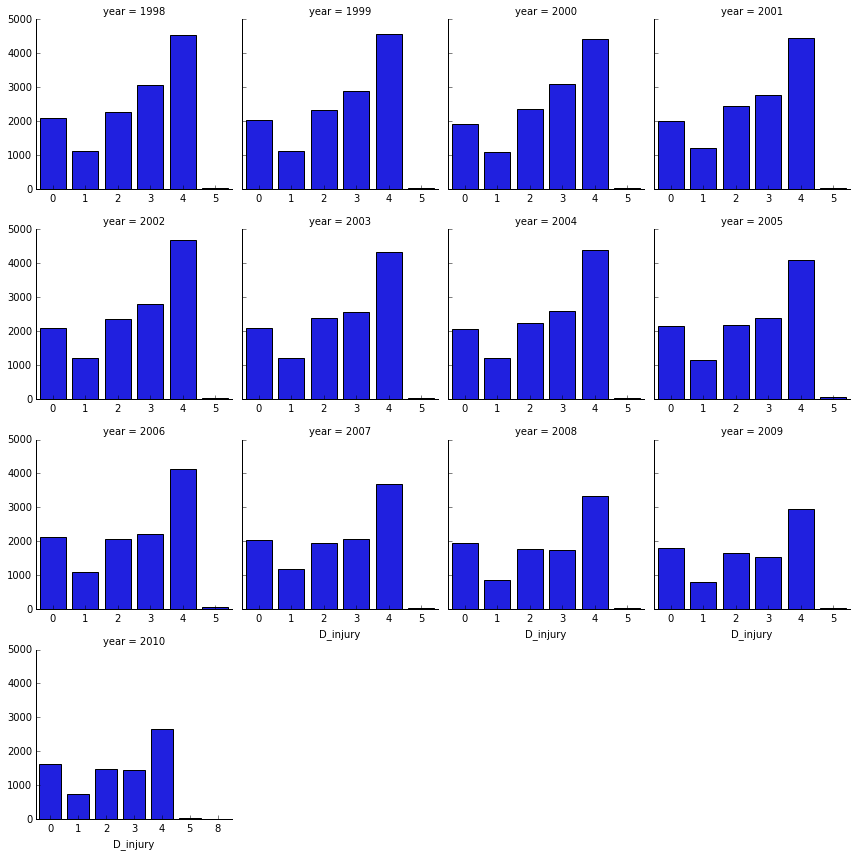

In [12]:
g = sns.FacetGrid(data, col="year", col_wrap=4, sharex=False)
g = g.map(sns.countplot, 'D_injury')

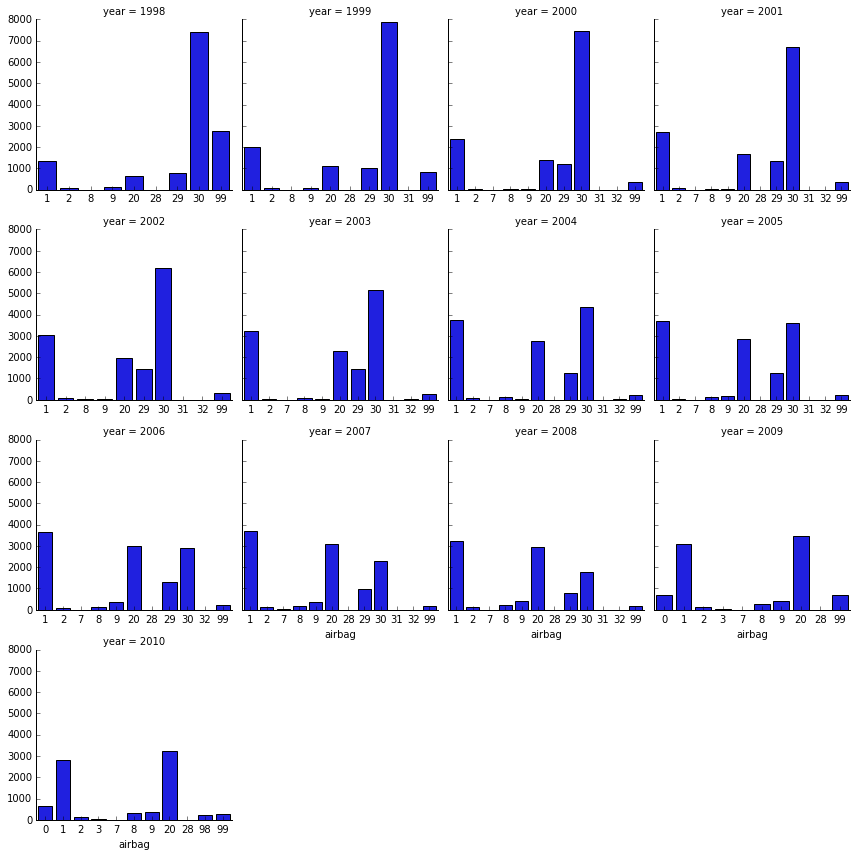

In [4]:
g = sns.FacetGrid(data, col="year", col_wrap=4, sharex=False)
g = g.map(sns.countplot, 'airbag')

### stacked bar graph type 30 vs all

In [5]:
#lazy, need to find an optimized way to do this.
airbag_df = data[['airbag', 'year']]
airbag_df.loc[airbag_df.airbag != 30, 'airbag'] = 'other'

/usr/local/lib/python2.7/dist-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [6]:
airbag_df.head()

,airbag,year
0,30,1998
1,30,1998
2,30,1998
3,other,1998
4,30,1998


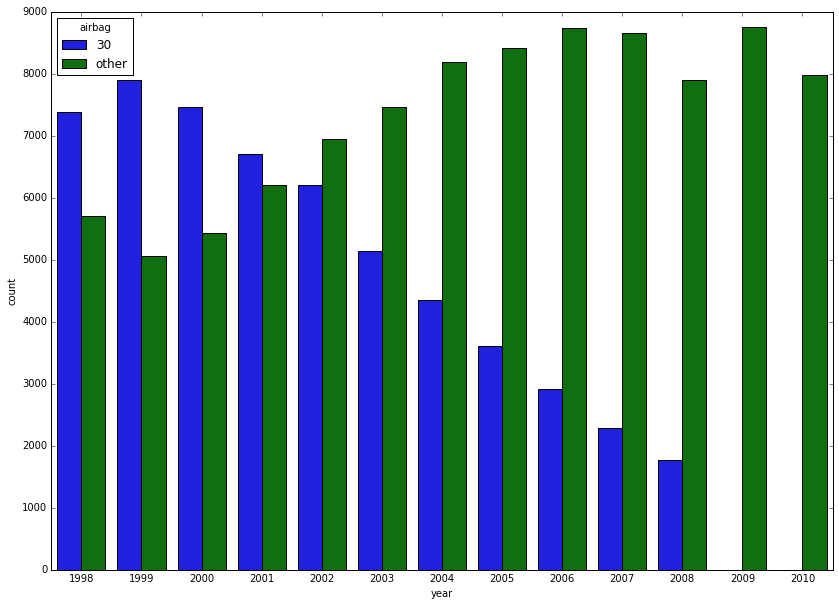

In [7]:
plt.figure(figsize = (14,10))
ax = sns.countplot(x='year', hue='airbag', data=airbag_df)
total_rows = airbag_df.shape[0]

### Fatal Injuries in  states

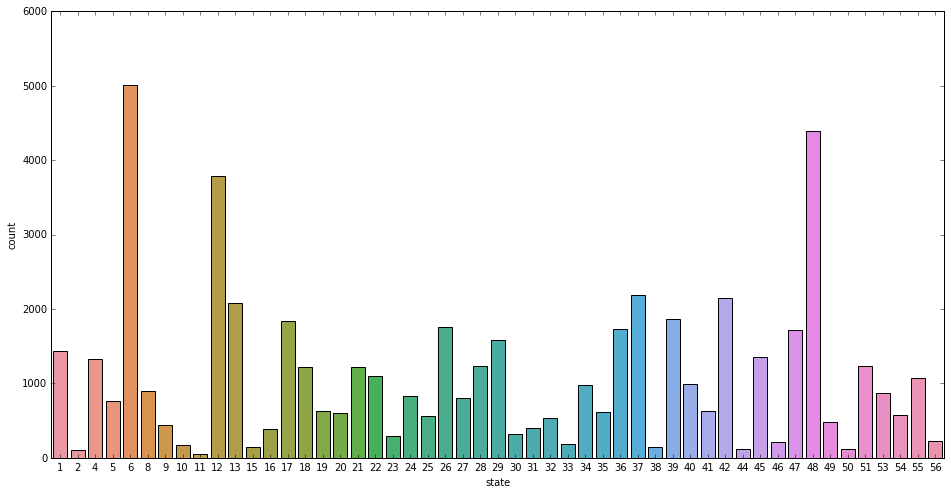

In [8]:
#states with a;; passangers deaths
fatalp_states = data[(data.injury == 4)]
count_plot('state', 'x', fatalp_states, 'notshow')

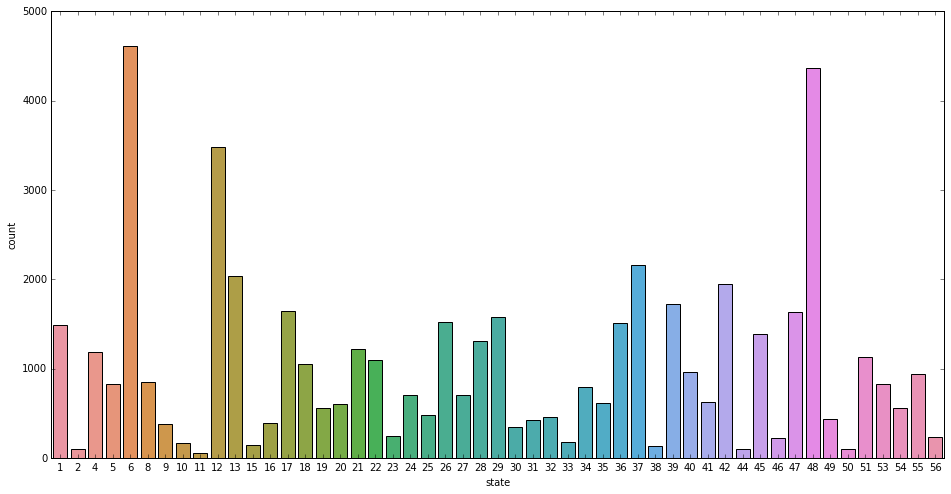

In [9]:
#states with driver deaths
fatald_states = data[(data.D_injury == 4)]
count_plot('state', 'x', fatald_states, 'notshow')

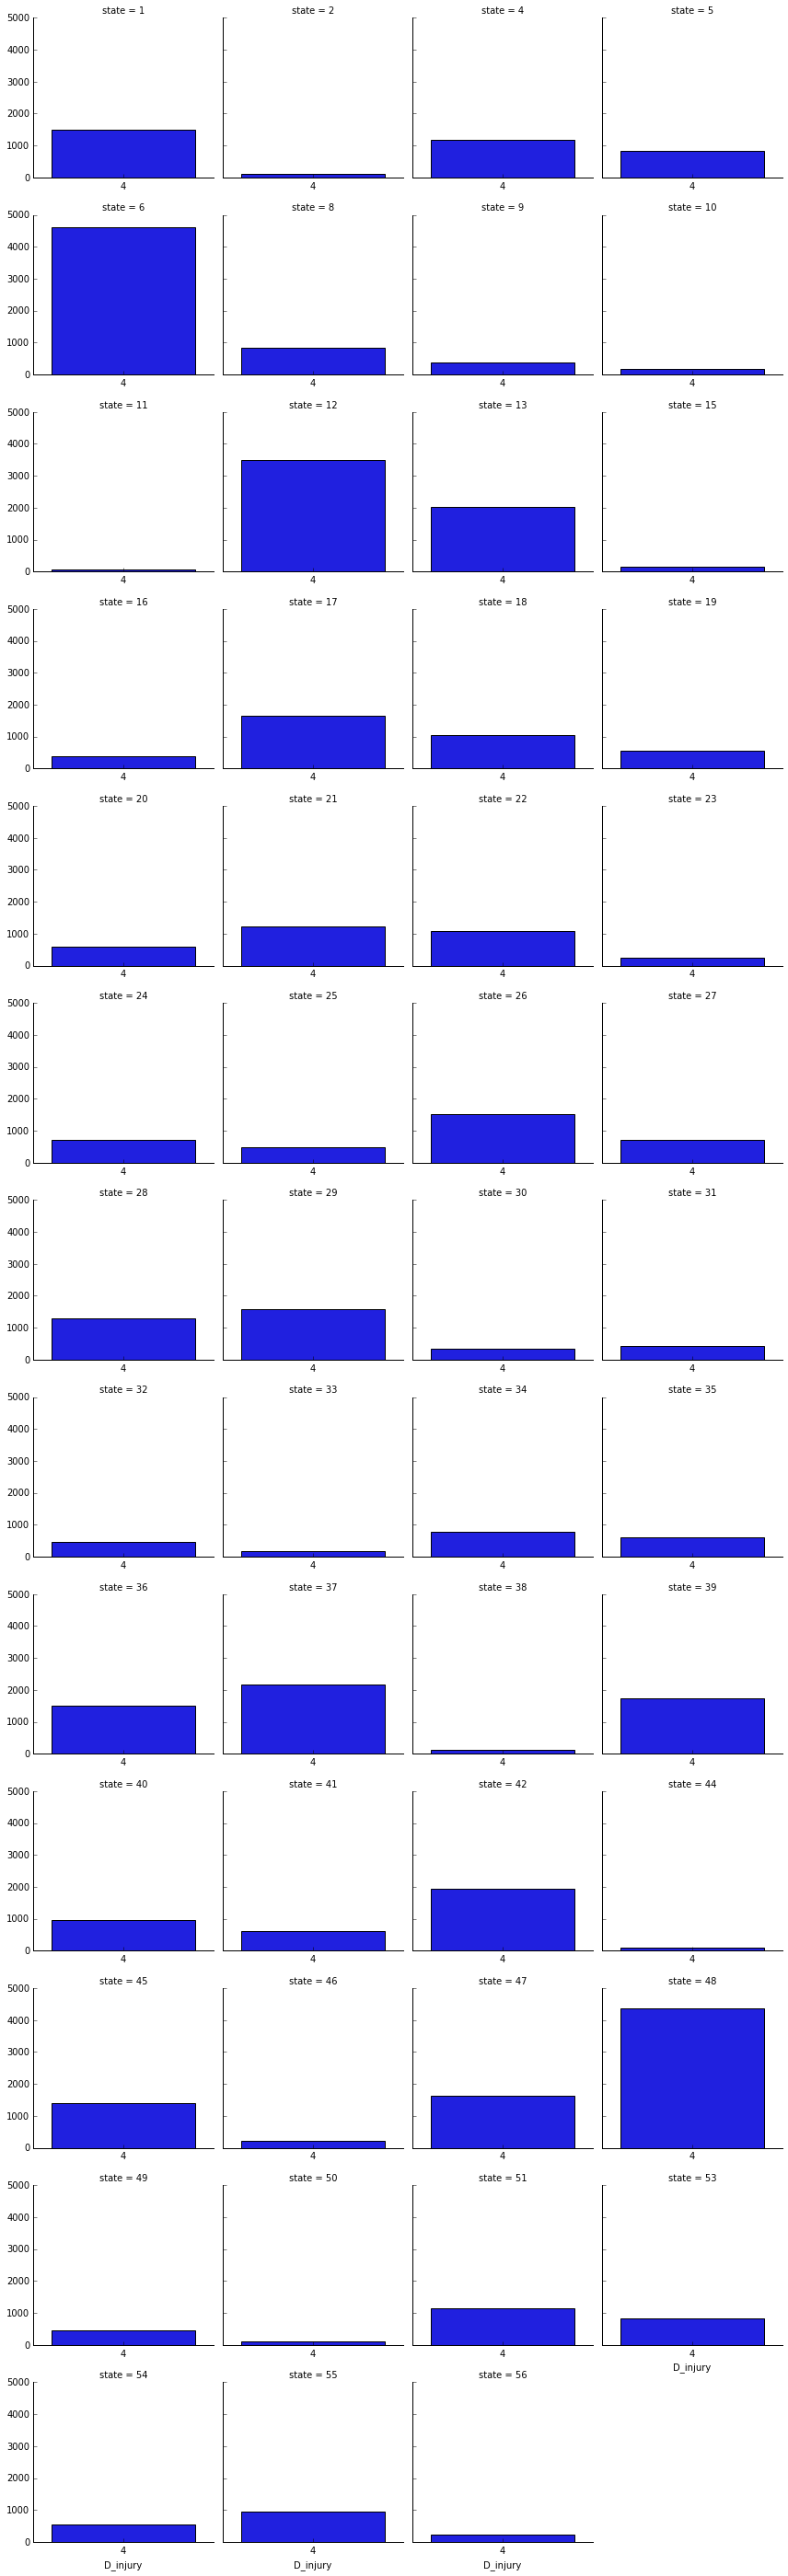

In [10]:
g = sns.FacetGrid(fatald_states, col="state", col_wrap=4, sharex=False)
g = g.map(sns.countplot, 'D_injury')